# Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Data

In [2]:
data= pd.read_csv("Datos/Grupos.csv")

In [3]:
data.drop(data.columns[-1], axis= 1, inplace=True)

In [4]:
data.dropna(inplace=True)

In [5]:
data.sample(5)

,Individuo,Orden de preferencia,Clave,Nombre de la Materia
58,49,1,2032.0,Análisis de Regresión
437,1,1,2047.0,Contabilidad de Seguros
495,38,4,2049.0,Evaluación de proyectos
86,89,1,2032.0,Análisis de Regresión
73,73,4,2032.0,Análisis de Regresión


# Preprocesing

In [6]:
df= data.copy()

## Top 10 subjects

In [141]:
ls_top= list(df.groupby(["Nombre de la Materia"]).count().sort_values(by="Individuo", ascending=False).head(10).index)

In [142]:
df.groupby(["Nombre de la Materia"]).count().sort_values(by="Individuo", ascending=False).head(10)

,Individuo,Orden de preferencia,Clave
Nombre de la Materia,,,
Modelos y Simulación,85,85,85
Análisis de Regresión,64,64,64
Derivados,54,54,54
Evaluación de proyectos,54,54,54
Muestreo,42,42,42
Auditoría Actuarial,37,37,37
Análisis Multivariado,36,36,36
Estadística Bayesiana,35,35,35
Investigación de Operaciones II,32,32,32


In [143]:
ls_top

['Modelos y Simulación',
 'Análisis de Regresión',
 'Derivados',
 'Evaluación de proyectos',
 'Muestreo',
 'Auditoría Actuarial',
 ' Análisis Multivariado',
 'Estadística Bayesiana',
 ' Investigación de Operaciones II',
 'Series de Tiempo']

## Set subject as feature 

In [144]:
aux = df.groupby("Individuo")[["Clave"]].count().copy()

In [145]:
ls =[[0 for x in range(len(aux))] for x in range(len(ls_top))]
for _, row in df.iterrows():
    index= row["Individuo"]-1
    subject= row["Nombre de la Materia"]
    priority= row["Orden de preferencia"]
    if(subject in ls_top):
        ls[ls_top.index(subject)][index] = priority

In [146]:
for i,column in enumerate(ls_top):
    aux.insert(1,column,ls[i])

In [147]:
aux.drop(columns="Clave", inplace=True)

In [148]:
aux.head()

,Series de Tiempo,Investigación de Operaciones II,Estadística Bayesiana,Análisis Multivariado,Auditoría Actuarial,Muestreo,Evaluación de proyectos,Derivados,Análisis de Regresión,Modelos y Simulación
Individuo,,,,,,,,,,
1,0,0,0,4,2,0,3,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,4
4,0,0,0,0,0,0,2,3,0,0
5,0,0,0,0,1,0,0,3,0,5


In [149]:
aux.sum(axis=1).min()

1

# Clustering

## Dendogram

In [150]:
linkage_data = linkage(aux, method='ward', metric='euclidean')

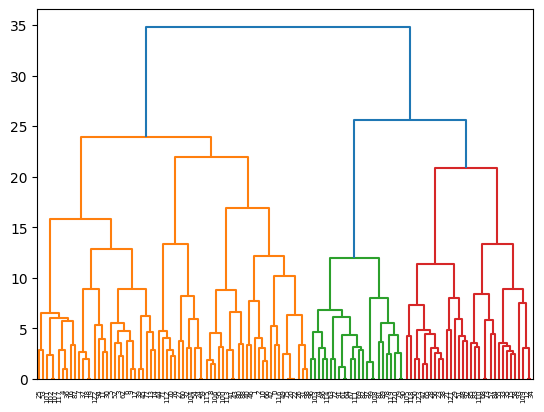

In [151]:
dendrogram(linkage_data)
plt.show()

## Hierarchical Clustering

In [152]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(aux)

In [153]:
aux["Cluster"] = labels

In [154]:
aux.sample(5)

,Series de Tiempo,Investigación de Operaciones II,Estadística Bayesiana,Análisis Multivariado,Auditoría Actuarial,Muestreo,Evaluación de proyectos,Derivados,Análisis de Regresión,Modelos y Simulación,Cluster
Individuo,,,,,,,,,,,
37,0,0,0,0,0,0,0,3,0,5,0
39,0,0,5,0,0,1,0,0,4,3,1
54,0,0,2,0,0,1,4,5,0,3,0
33,2,5,0,0,0,0,0,3,0,0,0
23,0,0,0,0,5,0,0,0,0,0,0


# Analysis

## Select cluster

In [155]:
aux.groupby("Cluster").count()["Derivados"]/ len(aux)

Cluster
0    0.548387
1    0.258065
2    0.193548
Name: Derivados, dtype: float64

Contamos con la mayor población agrupada en el cluster 0, entonces será en el cual nos basemos para tomar la desición

In [156]:
ls_count=[]
ls_ones=[]
for i in range(3):
    df_cluster= aux[aux["Cluster"] ==i]
    suma= 0
    ones=0
    for index, row in df_cluster.iterrows():
        for column in df_cluster.columns[:-1]:
            if(row[column]>0):
                suma+=1
                if(row[column]==1):
                    ones+=1
    ls_count.append(suma/(len(df_cluster)*5))
    ls_ones.append(ones/len(df_cluster))

In [157]:
ls_count

[0.6470588235294118, 0.91875, 0.8166666666666667]

In [158]:
ls_ones

[0.5294117647058824, 0.84375, 0.625]

Pero tambien hay que observar que en el cluster 1 tenemos el 91% de los alumnos tienen sus 5 elecciones, lo que implica que tiene menor pesos los ceros de las demás columnas. 

Y en el cluster 1 encontramos la mayor muestra de unos, o sea de materias que desean tener si o si esa materia.
Al no ser concluyente veremos las materias mas votadas por cada cluster y a traves de sus percentiles.  

## Percentiles

Partiremos por las materias que tienen votación a partir del percentil 60%

### Cluster 0

In [159]:
df0=aux[aux["Cluster"] ==0].copy()

In [160]:
df0.describe(percentiles=[.5,.6,.7,.8])

,Series de Tiempo,Investigación de Operaciones II,Estadística Bayesiana,Análisis Multivariado,Auditoría Actuarial,Muestreo,Evaluación de proyectos,Derivados,Análisis de Regresión,Modelos y Simulación,Cluster
count,68.000000,68.000000,68.000000,68.00,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,0.294118,0.941176,0.176471,0.75,1.338235,0.308824,1.691176,2.338235,0.705882,1.779412,0.0
std,0.734213,1.843766,0.645100,1.50,1.825281,0.868303,1.862893,2.189597,1.361067,1.875574,0.0
min,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,3.000000,0.000000,1.500000,0.0
60%,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,2.000000,3.000000,0.000000,3.000000,0.0
70%,0.000000,0.000000,0.000000,0.00,2.000000,0.000000,3.000000,4.000000,0.000000,3.000000,0.0
80%,0.000000,1.000000,0.000000,1.60,3.000000,0.000000,4.000000,5.000000,1.600000,4.000000,0.0
max,3.000000,5.000000,4.000000,5.00,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [162]:
ls_subjects0 = ['Auditoría Actuarial','Evaluación de proyectos','Modelos y Simulación','Derivados']

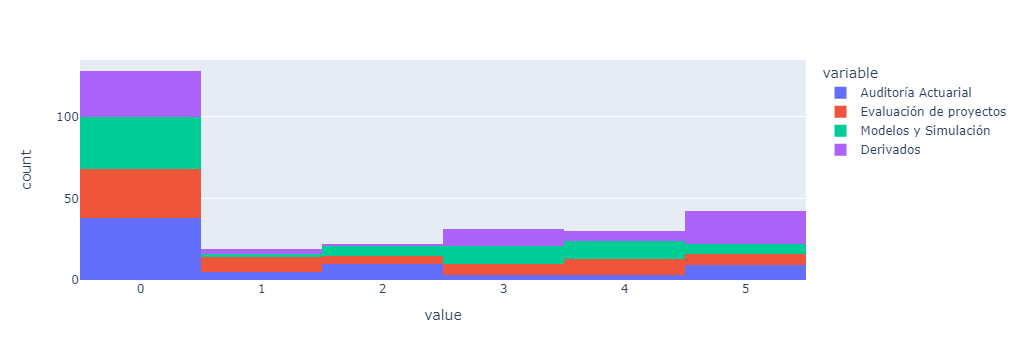

In [163]:
px.histogram(df0[ls_subjects0])

### Cluster 1

In [164]:
df1=aux[aux["Cluster"] ==1].copy()

In [165]:
df1.describe(percentiles=[.5,.6,.7,.8])

,Series de Tiempo,Investigación de Operaciones II,Estadística Bayesiana,Análisis Multivariado,Auditoría Actuarial,Muestreo,Evaluación de proyectos,Derivados,Análisis de Regresión,Modelos y Simulación,Cluster
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.00000,32.000000,32.000000,32.000000,32.0
mean,0.718750,0.750000,3.37500,0.687500,0.187500,2.62500,0.81250,0.437500,2.375000,2.093750,1.0
std,1.250403,1.319824,1.91345,1.119836,0.780302,2.01206,1.57475,0.840027,1.755177,1.691714,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,4.00000,0.000000,0.000000,3.00000,0.00000,0.000000,3.000000,2.000000,1.0
60%,0.000000,0.000000,5.00000,0.000000,0.000000,4.00000,0.00000,0.000000,3.000000,2.000000,1.0
70%,0.000000,0.700000,5.00000,0.700000,0.000000,4.00000,0.00000,0.000000,3.700000,3.000000,1.0
80%,2.000000,1.800000,5.00000,2.000000,0.000000,5.00000,1.00000,1.000000,4.000000,4.000000,1.0
max,4.000000,5.000000,5.00000,3.000000,4.000000,5.00000,5.00000,3.000000,5.000000,5.000000,1.0


In [166]:
ls_subjects1 = ['Estadística Bayesiana','Muestreo','Modelos y Simulación', 'Análisis de Regresión']

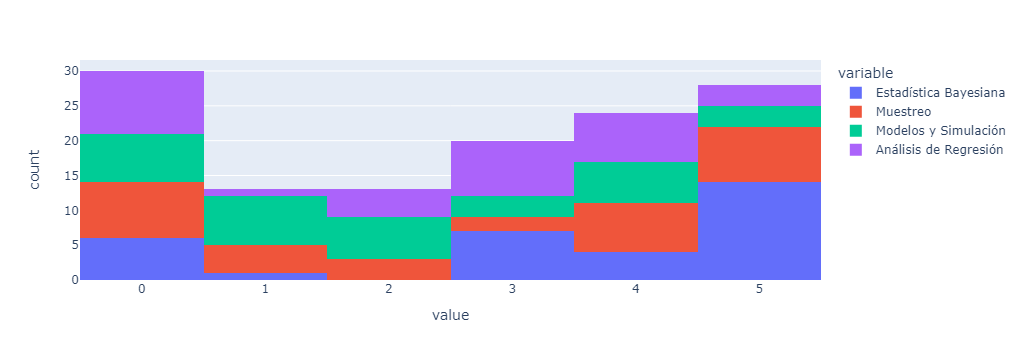

In [167]:
px.histogram(df1[ls_subjects1])

### Cluster 2

In [168]:
df2=aux[aux["Cluster"] ==2].copy()

In [169]:
df2.describe(percentiles=[.5,.6,.7,.8])

,Series de Tiempo,Investigación de Operaciones II,Estadística Bayesiana,Análisis Multivariado,Auditoría Actuarial,Muestreo,Evaluación de proyectos,Derivados,Análisis de Regresión,Modelos y Simulación,Cluster
count,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.0
mean,0.708333,0.333333,0.25000,1.333333,0.416667,0.500000,0.541667,0.37500,4.541667,4.125000,2.0
std,1.301476,0.761387,0.73721,1.785611,0.880547,0.780189,0.931533,0.76967,0.588230,0.797414,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,2.000000,2.0
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,4.000000,2.0
60%,0.000000,0.000000,0.00000,1.600000,0.000000,0.000000,0.000000,0.00000,5.000000,4.000000,2.0
70%,0.000000,0.000000,0.00000,2.000000,0.000000,1.000000,0.100000,0.00000,5.000000,5.000000,2.0
80%,2.000000,0.400000,0.00000,3.000000,0.400000,1.000000,1.400000,0.40000,5.000000,5.000000,2.0
max,4.000000,3.000000,3.00000,5.000000,3.000000,3.000000,3.000000,2.00000,5.000000,5.000000,2.0


In [129]:
ls_subjects2 = [' Análisis Multivariado','Análisis de Regresión','Modelos y Simulación']

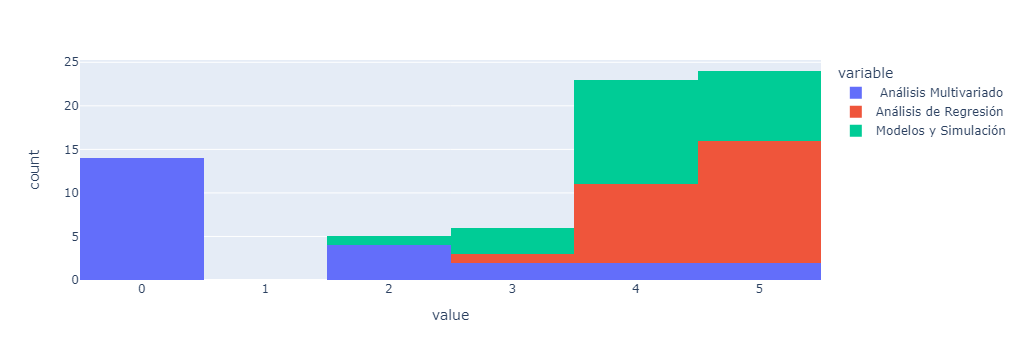

In [171]:
px.histogram(df2[ls_subjects2])

## Visualization cluster 1-2

Analizaremos que opinan de las materias los cluster 1 y 2, los cual considero mejor clasificados hasta conseguir las materias relevantes.

Despues de graficar todas las columnas, encontre que las materias con mejor aceptación dando mayor ponderación a la clase 1, son:

In [177]:
ls_final= [ 'Análisis de Regresión','Modelos y Simulación','Muestreo']

In [173]:
df_test= aux[aux["Cluster"]>0].copy()

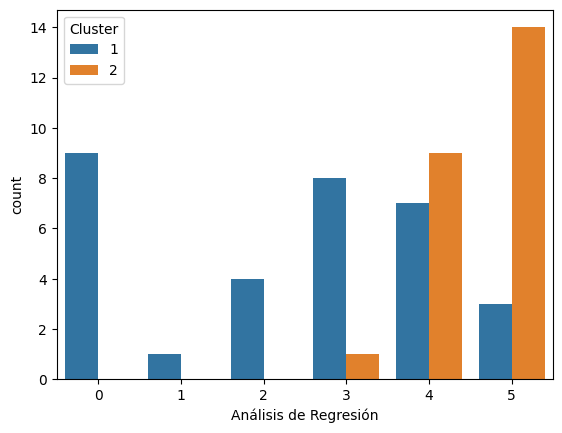

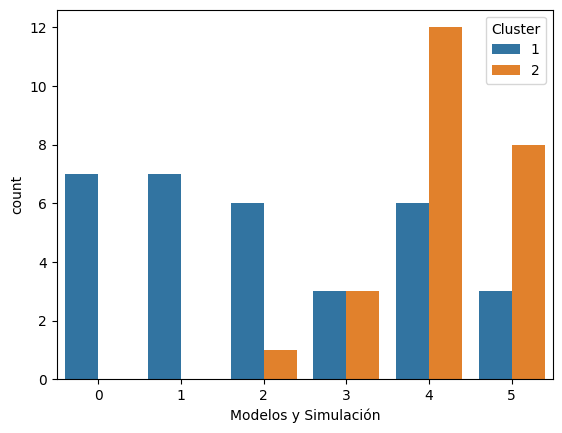

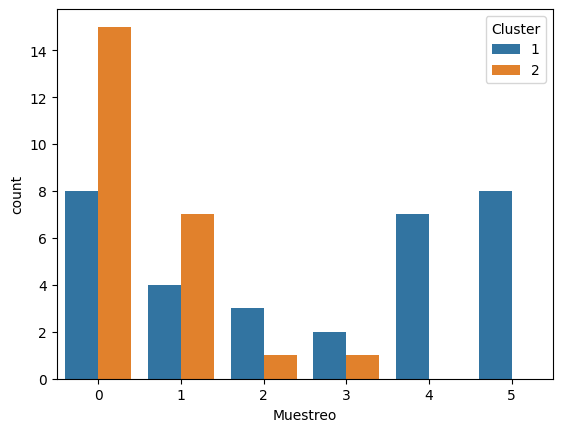

In [178]:
for subject in ls_final:
    sns.countplot(df_test, x= subject, hue='Cluster')
    plt.show()

Puesto que son los que menor cantidad de 0 acumula y tiene buena aceptación por ambas clases, en cuanto a las siguientes dos materias añadiremos la clase 0 y veremosque las que tienen mejor aceptación son:  
- Evaluación de proyectos
- Derivados

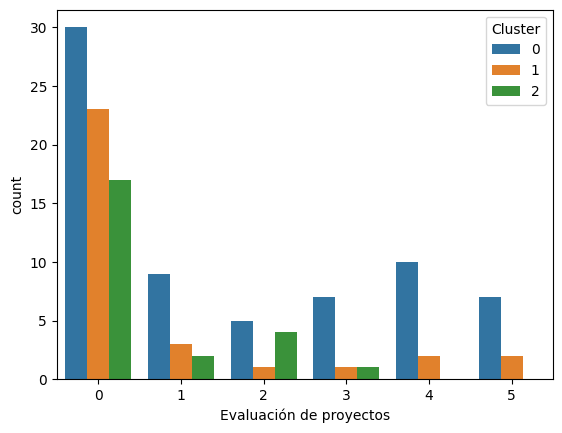

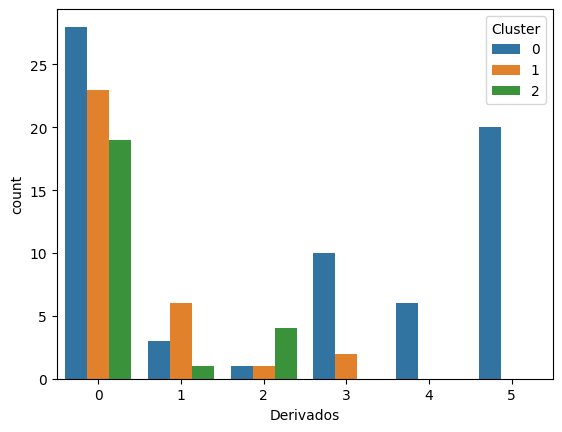

In [179]:
for subject in ['Evaluación de proyectos', 'Derivados']:
    sns.countplot(aux, x= subject, hue='Cluster')
    plt.show()

In [180]:
ls_final.append('Evaluación de proyectos')
ls_final.append('Derivados')

 Por tanto la lista final se compone de :

In [181]:
ls_final

['Análisis de Regresión',
 'Modelos y Simulación',
 'Muestreo',
 'Evaluación de proyectos',
 'Derivados']

Que de hecho resultan ser las materias con mayor numero de votos en general.